# TCC Studies: Sparse Matrices For Efficient Machine Learning

https://dziganto.github.io/Sparse-Matrices-For-Efficient-Machine-Learning/

### Setup

I generated a sparse 2,000 by 10,000 dataset matrix composed of zeros and ones.

In [29]:
# Lib imports and definitions
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
import seaborn as sns

In [11]:
# IPython Magic Functions
# will make plot outputs appear and be stored within the notebook.
%matplotlib inline 

In [18]:
# Defaults fot better plots
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
# turn on interactive mode
plt.ion() 
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [25]:
np.random.seed(seed=12)  ## for reproducibility

# Our dataset:
dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  ## dummy data
y = np.random.binomial(1, 0.5, 2000)  ## dummy target variable

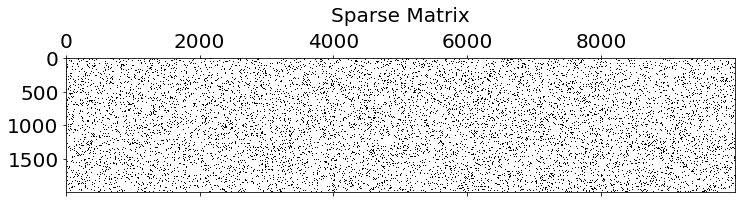

In [26]:
plt.title("Sparse Matrix", 
          pad='30.0' # So the title can appear above the plot
         );
plt.spy(dataset)

Notice that the graph is mostly white. For comparison purposes, here’s a dense matrix.

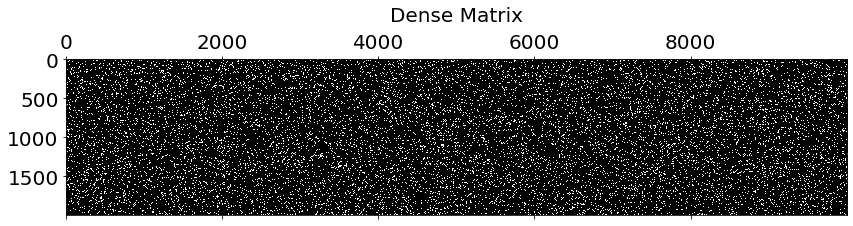

In [27]:
np.random.seed(seed=43)
plt.figure(figsize=(14,12))
plt.spy(np.random.binomial(1, 0.9, 20000000).reshape(2000,10000))
plt.title("Dense Matrix", pad='30.0');

### Scipy CSR

We have a data matrix called dataset. 
We already know it is very sparse so let’s go ahead and transform it with Scipy’s CSR.

In [38]:
sparse_dataset = csr_matrix(dataset)

dense_size = np.array(dataset).nbytes/1e6

sparse_size = (sparse_dataset.data.nbytes +      # data:    Total bytes consumed by the elements of the array.
               sparse_dataset.indices.nbytes +   # indices: Mapping data to their column in a sparse matrix
               sparse_dataset.indptr.nbytes)/1e6 # indptr:  Mapping data and indices to rows in the sparse matrix
                                                 # 1e6:     100.000: bytes/1000 => kilobytes/1000 => megabytes

Explaining what are indptr and indices in a sparse matrix
https://stackoverflow.com/questions/52299420/scipy-csr-matrix-understand-indptr

Text(0.5, 1.0, 'Compression')

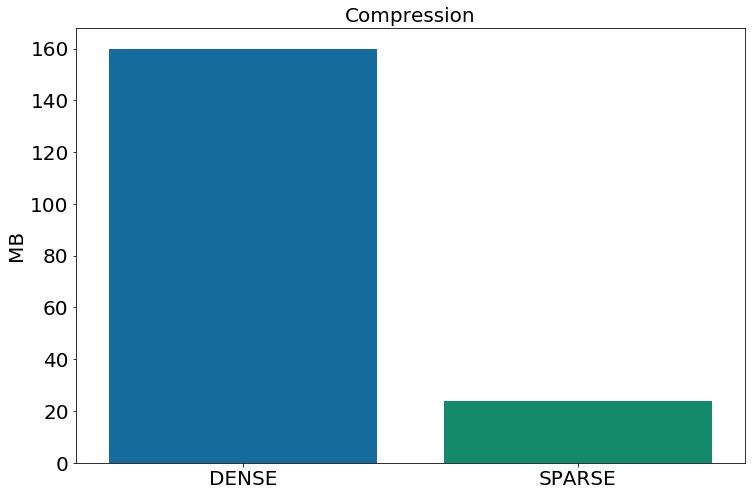

In [39]:
sns.barplot(['DENSE', 'SPARSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')

### As you can see, the Naive Bayes classifier ran 8 times faster when operating on the sparse matrix!

In [44]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB(binarize=None)

%timeit nb.fit(dataset, y)
%timeit nb.fit(sparse_dataset, y)

597 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.1 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### For logistic regression, we see roughly a 33% decrease in processing time. Not quite as performant as Naive Bayes but a big difference nonetheless.

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=99)

%timeit lr.fit(dataset, y)
%timeit lr.fit(sparse_dataset, y)

2.34 s ± 358 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.85 times longer than the fastest. This could mean that an intermediate result is being cached.
831 ms ± 644 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### And finally, we have SVM. With sparse matrices we are able to achieve roughly a 50% reduction in processing time!

In [42]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

%timeit svc.fit(dataset, y)
%timeit svc.fit(sparse_dataset, y)

237 ms ± 3.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
149 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


All in all, converting sparse matrices to the sparse matrix format almost always yields some efficiency in processing time. We saw this to be the case for Naive Bayes, Logistic Regression, and Support Vector Machines. 

Where do we not see improved processing times? Decision tree based algorithms like random forest.